### Neural Network

Neural Network(신경망)이란 사람의 뇌가 자극을 처리하는 신호를 본따 만든 모델입니다. 신경망은 perceptron이라는 기본 단위의 모델로 이루어져 있는데, 단순한 이진처리를 하는 perceptron이 모여 하나의 거대한 모델을 구성하는 구조로 이루어져 있습니다.

#### Perceptron

Perceptron이란 단일 뉴런이 자극을 처리하는 과정을 본따 만든 모델입니다.
뉴런이 자극을 받았을 때 일정 자극 이상을 받으면 신호를 보내는 것 처럼, perceptron은 input들의 값을 받아 특정 값 이상을 충족한다면 값을 출력합니다.


![image](https://image.slidesharecdn.com/lecture29-convolutionalneuralnetworks-visionspring2015-150504114140-conversion-gate02/95/lecture-29-convolutional-neural-networks-computer-vision-spring2015-9-638.jpg?cb=1430740006)

![image](https://images.velog.io/images/kyj93790/post/307d968e-2f2c-4606-b5ca-e43f2ff33343/image.png)

다음은 perceptron을 이용하여 OR과 AND를 처리하는 과정을 학습해보려고 합니다.

Input이 각각 0 또는 1로 주어졌을 때

- AND는 둘다 1일 경우 1을, 그렇지 않으면 0을 반환
- OR는 둘 중 하나라도 1이면 1을, 그렇지 않으면 0을 반환

![image](https://velog.velcdn.com/images%2Fgan-ta%2Fpost%2Fb2fed285-7125-4ccc-aa86-677e130b3fb2%2F%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-18%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%206.43.53.png)

In [ ]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y_or = OR(xs[0], xs[1])
    print("OR gate: ", str(xs) + " -> " + str(y_or))

    
    y_and = AND(xs[0], xs[1])
    print("AND gate: ",str(xs) + " -> " + str(y_and))

OR gate:  (0, 0) -> 0
AND gate:  (0, 0) -> 0
OR gate:  (1, 0) -> 1
AND gate:  (1, 0) -> 0
OR gate:  (0, 1) -> 1
AND gate:  (0, 1) -> 0
OR gate:  (1, 1) -> 1
AND gate:  (1, 1) -> 1


### MultiLayer Perceptron(MLP)



그러나 단일 perceptron만으로는 복잡한 문제를 해결할 수 없습니다. 예를 들어, 위의 하나의 perceptron 만으로는 AND나 OR과 같은 선형적인 문제는 해결할 수 있겠지만, XOR(두 변수가 다를경우 1, 같으면 0)과 같은 비선형적인 문제는 해결할 수 없습니다. 그렇다면 perceptron을 이용하여 어떻게 비선형 문제를 해결할 수 있을까요?

 답은 간단합니다. perceptron을 여러개 사용하면 되죠! 여러 층의 perceptron을 형성하여 비선형적인 문제를 해결할 수 있는 모델을 우리는 Multilayer perceptron(MLP)라고 합니다.

 Input으로부터 받은 값들을 여러개의 perceptron을 거쳐 output을 반환하게 됩니다. 이 때 중간의 perceptron을 hidden layer라고 하는데, 비선형함수인 활성함수를 통해 신호가 처리되기 때문에 값이 어떻게 바뀌는지 확인할 수 없어 hidden layer라고 불립니다.

![image](https://miro.medium.com/max/432/1*y0pXhfaTGmvfNwaGoHnW5w.jpeg)



그렇다면, 앞서 배운 AND와 OR을 이용하여 XOR을 만들어 보도록 하겠습니다.
![image](https://images.velog.io/images/citizenyves/post/041d474a-9cd7-48e8-86d4-8f04cb5726b2/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-11-16%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2012.59.42.png)

In [ ]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:  ## Step
        return 0
    else:
        return 1

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


### 활성함수(Activation Function)

활성함수란 입력신호를 출력신호로 변환해주는 함수입니다. 우리가 위에서 threshold로 0을 걸어준 것이 바로 대표적인 활성함수의 예시이죠. 활성함수를 통해서 입력으로 처리된 값들을 비선형적인 값으로 변환하여 다음 hidden layer로 넘겨주는 역할을 합니다.

대표적인 활성함수로는 

- step : threshold를 기준으로 0과 1을 나눔
- sigmoid
- tanh
- relu

가 있습니다.

In [ ]:
def step(x, threshold=0):
    if x >= threshold:
        return 1
    else:
        return 0

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
def relu(x):
    return np.maximum(0, x)

활성함수들을 비교해보겠습니다.

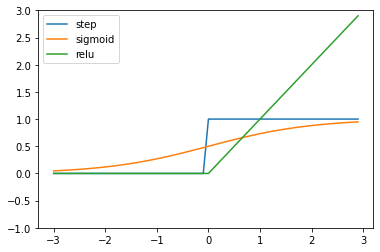

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(-3.0, 3.0, 0.1)
plt.plot(x, np.array([step(xi) for xi in x]), label = "step")
plt.plot(x, sigmoid(x), label = "sigmoid")
plt.plot(x, relu(x), label = "relu")
plt.ylim(-1.0, 3.0)
plt.legend()
plt.show()

### Code on Tensorflow

Tensorflow에서 간단한 코드로 perceptron과 MLP를 구현해 보도록 하겠습니다.

Reference: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ko

Tensorflow에서는 keras.layers.Dense라는 함수를 이용하여 하나의 perceptron 층을 형성할 수 있습니다. activation을 이용하여 어떤 활성함수를 이용할 지 결정합니다.

activation에서는 'sigmoid', 'tanh', 'relu', 'softmax'가 있습니다.

다음 코드를 이용하면 위에서 배웠던 perceptron을 활성함수까지 한줄 만에 처리가 가능하죠!

In [ ]:
import tensorflow as tf

perceptron = tf.keras.layers.Dense(1, activation = 'sigmoid')
perceptron(np.array([[0,0],[0,1],[1,0],[1,1]]))

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.5       ],
       [0.24379358],
       [0.35681248],
       [0.15171427]], dtype=float32)>

Perceptron을 여러개 쌓게 되면 우리가 아는 MLP를 만들 수 있죠. 간단하죠?

In [ ]:
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28))
        self.dense = tf.keras.layers.Dense(2, activation='relu')
        self.out = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, input_tensor):
        flat = self.flatten(input_tensor)
        dense = self.dense(flat)
        return self.out(dense)

mlp = MLP()
mlp(np.array([[0,0],[0,1],[1,0],[1,1]]))

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.5      ],
       [0.5      ],
       [0.7214208],
       [0.5449212]], dtype=float32)>

### MLP on Pytorch

다음은 pytorch를 이용하여 perceptron과 MLP를 생성해보도록 하겠습니다.
Pytorch에서는 torch.nn.Linear를 이용하여 단일 perceptron을 생성할 수 있습니다.
이 때 tensorflow와는 달리 별개의 활성함수를 추가하여야 하고 input은 항상 tensor여야 합니다.

Reference: https://pythonguides.com/pytorch-mnist/

In [ ]:
import torch
import torch.nn as nn

input = torch.FloatTensor(np.array([[0,0],[0,1],[1,0],[1,1]]))
perceptron = nn.Sequential(nn.Linear(2,1, bias = True),
                            nn.Sigmoid())
perceptron(input)

tensor([[0.4993],
        [0.4822],
        [0.4385],
        [0.4218]], grad_fn=<SigmoidBackward0>)

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.linear = nn.Linear(2,2)                 
        self.final = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input):
        input = self.linear(input)
        input = self.final(input)
        return self.sigmoid(input)
mlp = MLP()
mlp(input)

tensor([[0.3847],
        [0.4050],
        [0.3018],
        [0.3201]], grad_fn=<SigmoidBackward0>)